[513 160]
[513 160]
[513 160]
[513 160]
[513 160]
[513 160]
[513 160]
[513 160]
[513 161]
[513 161]


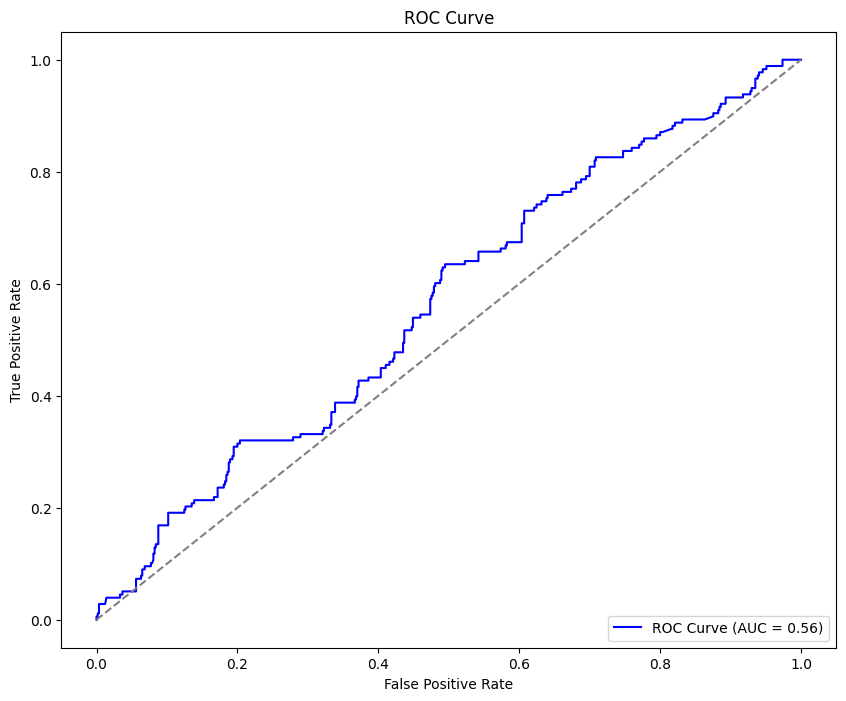

Balanced Accuracy: 0.54


In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import pandas as pd
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score

# Load data from the CSV file
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/blood_donation.csv"
data = pd.read_csv(fileName)

# Separate features (X) and the target variable (y)
X = data.drop('Donated', axis=1)
y = data['Donated']

# Set up cross-validation with 10 splits
cross_validator = StratifiedKFold(n_splits=10)
all_predictions = []
all_true_values = []

# Evaluate the model on each split
for train_index, test_index in cross_validator.split(X, y):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(np.bincount(y_train))

    # Create and train the model
    classifier = xgb.XGBClassifier()
    classifier.fit(X_train, y_train)

    # Store predictions and true values
    test_probabilities = classifier.predict_proba(X_test)[:, 1]
    all_predictions.extend(test_probabilities)
    all_true_values.extend(y_test)

# Compute evaluation metrics using all predictions
false_positive_rate, true_positive_rate, _ = roc_curve(all_true_values, all_predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
balanced_accuracy = balanced_accuracy_score(all_true_values, np.round(all_predictions))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(false_positive_rate, true_positive_rate, color='blue',
 label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Print the balanced accuracy
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")